In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

# Load the flights dataset
flights = pd.read_csv('flights.csv').dropna()
flights

,year,month,day,dep_time,sched_dep_time,delay,dep_delay,arr_time,sched_arr_time,arr_delay,...,time_hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
1,2013,1,1,533.0,529,1,4.0,850.0,830,20.0,...,1/1/13 5:00,39.92,24.98,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0
4,2013,1,1,554.0,600,0,-6.0,812.0,837,-25.0,...,1/1/13 6:00,39.92,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0
7,2013,1,1,557.0,600,0,-3.0,709.0,723,-14.0,...,1/1/13 6:00,39.92,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0
9,2013,1,1,558.0,600,0,-2.0,753.0,745,8.0,...,1/1/13 6:00,39.92,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0
14,2013,1,1,559.0,600,0,-1.0,941.0,910,31.0,...,1/1/13 6:00,39.92,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332572,2013,9,26,1141.0,1145,0,-4.0,1457.0,1456,1.0,...,9/26/13 11:00,66.02,53.96,65.07,40.0,16.11092,21.86482,0.0,1017.0,10.0
332575,2013,9,26,1151.0,1150,1,1.0,1429.0,1415,14.0,...,9/26/13 11:00,66.02,53.96,65.07,40.0,16.11092,21.86482,0.0,1017.0,10.0
332577,2013,9,26,1151.0,1159,0,-8.0,1346.0,1344,2.0,...,9/26/13 11:00,66.02,53.96,65.07,40.0,16.11092,21.86482,0.0,1017.0,10.0
332586,2013,9,26,1158.0,1125,1,33.0,1339.0,1310,29.0,...,9/26/13 11:00,66.02,53.96,65.07,40.0,16.11092,21.86482,0.0,1017.0,10.0


In [2]:
# Subset to only the flights from JFK and summarize
JFK = flights[flights['origin'] == 'JFK']
JFK.describe()

,year,month,day,dep_time,sched_dep_time,delay,dep_delay,arr_time,sched_arr_time,arr_delay,...,minute,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
count,19212.0,19212.000000,19212.000000,19212.000000,19212.000000,19212.000000,19212.000000,19212.000000,19212.000000,19212.000000,...,19212.000000,19212.000000,19212.000000,19212.000000,19212.000000,19212.000000,19212.000000,19212.000000,19212.000000,19212.000000
mean,2013.0,5.638872,15.861181,1440.342650,1434.050697,0.440142,11.041068,1597.486363,1631.246304,6.385801,...,27.950344,49.681037,29.361733,48.178220,257.730065,18.758277,27.176665,0.001643,1015.584744,9.665457
std,0.0,3.522635,8.414391,440.106297,421.362397,0.496417,36.056830,521.220827,479.320081,40.758424,...,19.590706,16.983917,19.209927,18.795276,89.662874,4.855519,5.904150,0.016018,7.332004,1.491381
min,2013.0,1.000000,1.000000,1.000000,540.000000,0.000000,-18.000000,1.000000,1.000000,-70.000000,...,0.000000,14.000000,-9.940000,16.660000,10.000000,5.753900,16.110920,0.000000,985.700000,0.120000
25%,2013.0,3.000000,8.000000,1059.000000,1100.000000,0.000000,-5.000000,1241.000000,1308.000000,-15.000000,...,10.000000,37.040000,15.080000,34.300000,230.000000,14.960140,23.015600,0.000000,1010.800000,10.000000
50%,2013.0,4.000000,17.000000,1525.000000,1515.000000,0.000000,-1.000000,1721.000000,1734.000000,-4.000000,...,30.000000,46.940000,26.060000,43.670000,290.000000,18.412480,26.467940,0.000000,1015.300000,10.000000
75%,2013.0,9.000000,23.000000,1749.000000,1730.000000,1.000000,10.000000,2008.000000,2011.000000,14.000000,...,45.000000,62.060000,44.060000,58.210000,320.000000,21.864820,29.920280,0.000000,1020.400000,10.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1.000000,797.000000,2400.000000,2359.000000,783.000000,...,59.000000,96.080000,73.040000,96.850000,360.000000,36.824960,66.745240,0.530000,1038.100000,10.000000


In [3]:
# Subset to the only the delayed flights from JFK and summarize
JFK_delays = JFK[JFK['delay'] == 1]
JFK_delays.describe()

,year,month,day,dep_time,sched_dep_time,delay,dep_delay,arr_time,sched_arr_time,arr_delay,...,minute,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
count,8456.0,8456.000000,8456.000000,8456.000000,8456.000000,8456.0,8456.000000,8456.000000,8456.000000,8456.000000,...,8456.000000,8456.000000,8456.000000,8456.000000,8456.000000,8456.000000,8456.000000,8456.000000,8456.000000,8456.000000
mean,2013.0,5.570009,16.065634,1552.646050,1521.623108,1.0,30.947256,1654.383278,1707.746689,26.787961,...,29.191698,50.233217,30.706325,50.072654,254.259697,19.044620,27.511073,0.002155,1015.083680,9.531832
std,0.0,3.465101,8.381632,423.496968,391.666023,0.0,47.301775,573.857707,480.606426,51.698680,...,19.298392,17.514312,20.168162,20.017831,89.905901,4.932065,6.156136,0.019070,7.469221,1.795186
min,2013.0,1.000000,1.000000,1.000000,540.000000,1.0,0.000000,1.000000,1.000000,-65.000000,...,0.000000,14.000000,-9.940000,16.660000,10.000000,5.753900,16.110920,0.000000,985.700000,0.120000
25%,2013.0,3.000000,9.000000,1317.000000,1300.000000,1.0,3.000000,1404.000000,1432.000000,-4.000000,...,10.000000,37.040000,15.080000,34.570000,190.000000,16.110920,23.015600,0.000000,1009.900000,10.000000
50%,2013.0,4.000000,17.000000,1616.000000,1555.000000,1.0,13.000000,1825.000000,1826.000000,12.500000,...,30.000000,47.120000,28.040000,45.150000,290.000000,18.412480,26.467940,0.000000,1014.800000,10.000000
75%,2013.0,9.000000,23.000000,1846.000000,1815.000000,1.0,39.000000,2044.000000,2040.000000,41.000000,...,45.000000,62.960000,46.940000,64.300000,320.000000,21.864820,29.920280,0.000000,1020.200000,10.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1.0,797.000000,2400.000000,2359.000000,783.000000,...,59.000000,96.080000,73.040000,96.850000,360.000000,36.824960,66.745240,0.530000,1038.100000,10.000000


In [4]:
# Subset to only the flights from LGA and summarize
LGA = flights[flights['origin'] == 'LGA']
LGA.describe()

,year,month,day,dep_time,sched_dep_time,delay,dep_delay,arr_time,sched_arr_time,arr_delay,...,minute,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
count,25178.0,25178.000000,25178.000000,25178.000000,25178.000000,25178.000000,25178.000000,25178.000000,25178.000000,25178.000000,...,25178.000000,25178.000000,25178.000000,25178.000000,25178.000000,25178.000000,25178.000000,25178.000000,25178.000000,25178.000000
mean,2013.0,6.228414,15.033680,1364.514656,1356.748431,0.388951,9.877592,1556.690801,1569.620859,5.740210,...,24.239892,52.857652,32.166560,47.058367,250.580268,16.195064,24.553462,0.001178,1015.548014,9.863601
std,0.0,3.604562,8.332996,415.319069,396.627375,0.487522,38.046796,435.410283,403.915536,42.088081,...,20.142337,19.364953,19.613546,14.553961,81.012289,4.616552,5.523336,0.011081,7.186287,0.860072
min,2013.0,1.000000,1.000000,1.000000,529.000000,0.000000,-23.000000,1.000000,14.000000,-68.000000,...,0.000000,12.020000,-7.060000,16.420000,10.000000,4.603120,16.110920,0.000000,983.800000,0.500000
25%,2013.0,3.000000,8.000000,1052.000000,1050.000000,0.000000,-6.000000,1241.000000,1250.000000,-17.000000,...,0.000000,37.040000,15.980000,37.210000,220.000000,12.658580,20.714040,0.000000,1010.700000,10.000000
50%,2013.0,6.000000,14.000000,1407.000000,1400.000000,0.000000,-3.000000,1609.000000,1619.000000,-5.000000,...,25.000000,50.000000,28.040000,45.120000,270.000000,16.110920,23.015600,0.000000,1015.600000,10.000000
75%,2013.0,10.000000,22.000000,1700.000000,1650.000000,1.000000,7.000000,1907.000000,1905.000000,12.000000,...,43.000000,68.000000,48.920000,54.680000,310.000000,18.412480,27.618720,0.000000,1020.600000,10.000000
max,2013.0,12.000000,31.000000,2400.000000,2225.000000,1.000000,660.000000,2400.000000,2349.000000,648.000000,...,59.000000,98.960000,73.040000,93.540000,360.000000,35.674180,50.634320,0.280000,1037.900000,10.000000


In [5]:
# Subset to only the delayed flights from LGA and summarize
LGA_delays = LGA[LGA['delay'] == 1]
LGA_delays.describe()

,year,month,day,dep_time,sched_dep_time,delay,dep_delay,arr_time,sched_arr_time,arr_delay,...,minute,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
count,9793.0,9793.000000,9793.000000,9793.000000,9793.000000,9793.0,9793.000000,9793.000000,9793.000000,9793.000000,...,9793.000000,9793.000000,9793.000000,9793.000000,9793.000000,9793.000000,9793.000000,9793.000000,9793.000000,9793.000000
mean,2013.0,6.223425,15.459001,1497.909629,1449.577249,1.0,34.036455,1656.588584,1662.364546,30.690902,...,25.651996,54.126454,34.172278,48.756412,246.576126,16.407399,24.788833,0.001867,1014.873930,9.786786
std,0.0,3.574732,8.280838,402.992542,373.935501,0.0,52.468301,463.043061,386.855066,55.745953,...,19.769980,20.511968,20.764093,15.413381,82.500927,4.717588,5.722032,0.014086,7.319391,1.109412
min,2013.0,1.000000,1.000000,1.000000,529.000000,1.0,0.000000,1.000000,14.000000,-58.000000,...,0.000000,12.020000,-7.060000,16.420000,10.000000,4.603120,16.110920,0.000000,985.000000,0.500000
25%,2013.0,3.000000,9.000000,1216.000000,1159.000000,1.0,3.000000,1411.000000,1413.000000,-3.000000,...,5.000000,37.040000,17.060000,37.810000,210.000000,12.658580,20.714040,0.000000,1009.900000,10.000000
50%,2013.0,6.000000,15.000000,1528.000000,1500.000000,1.0,14.000000,1730.000000,1721.000000,14.000000,...,28.000000,51.080000,28.940000,46.080000,270.000000,16.110920,24.166380,0.000000,1014.800000,10.000000
75%,2013.0,10.000000,23.000000,1812.000000,1735.000000,1.0,41.000000,2012.000000,1950.000000,44.000000,...,45.000000,71.960000,53.060000,57.330000,310.000000,19.563260,27.618720,0.000000,1020.200000,10.000000
max,2013.0,12.000000,31.000000,2400.000000,2225.000000,1.0,660.000000,2400.000000,2349.000000,648.000000,...,59.000000,98.960000,73.040000,93.540000,360.000000,35.674180,50.634320,0.280000,1037.900000,10.000000


In [6]:
# Run a t-test on the length of departure delay between the JFK and LGA
ttest_ind(
    a=JFK['dep_delay'],
    b=LGA['dep_delay'],
    equal_var=False,
    nan_policy='omit',
    alternative='two-sided',
)

TtestResult(statistic=np.float64(3.2886521699760425), pvalue=np.float64(0.0010075034511418358), df=np.float64(42379.52728176557))

Text(0.5, 1.0, 'Delays at JFK')

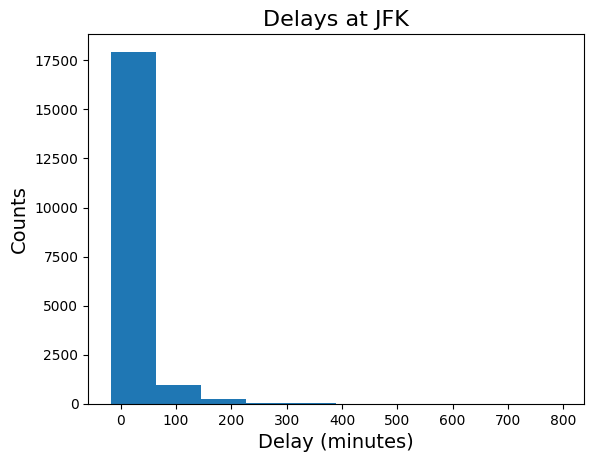

In [7]:
# Plot the distribution of JFK's delays
plt.hist(JFK['dep_delay'])
plt.xlabel('Delay (minutes)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Delays at JFK', fontsize=16)

Text(0.5, 1.0, 'Delays at LGA')

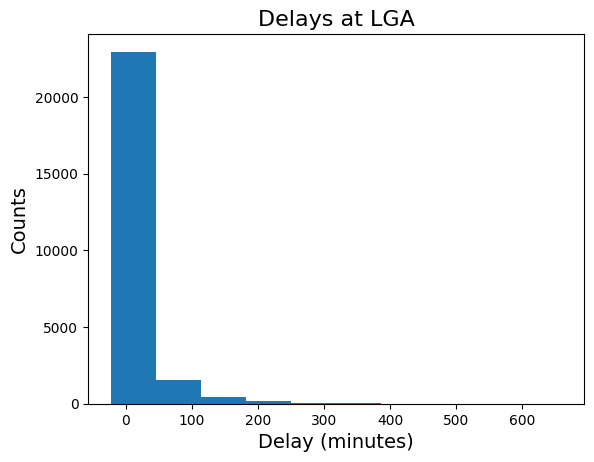

In [8]:
# Plot the distribution of LGA's delays
plt.hist(LGA['dep_delay'])
plt.xlabel('Delay (minutes)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Delays at LGA', fontsize=16)